In [1]:
import pandas as pd
import re
from os import makedirs
from os.path import join
from plotnine import *

In [9]:
def parse_temp_log(log_f,
                   max_z=50,
                   pattern="Temp1 (.+?), Z (.+?), N (\d)",
                   trial="Trial",
                   heatsink="generic",
                   heatbreak="generic",
                   block="generic",
                   nozzle="generic",
                   fan=True
                   ):
    """
    parses log files. 
    
    Takes open filehandle.
    
    Returns Pandas DataFrame object, with columns indicating Z, Temp, and replicate number.
    For Z, subtracts indicated Z value from max_z parameter to get the Z position relative
    to the starting point.
    """
    temp = []
    z = []
    rep = []

    for line in log_f:
        match = re.search(pattern, line)
        if match:
            temp.append(float(match.group(1)))
            z.append(max_z - float(match.group(2)))
            rep.append(int(match.group(3)))

    profile_df = pd.DataFrame.from_dict({"Z": z, "Temp": temp, "N": rep})
    profile_df['trial'] = trial
    profile_df['heatsink'] = heatsink
    profile_df['nozzle'] = nozzle
    profile_df['heatbreak'] = heatbreak
    profile_df['block'] = block
    profile_df['nozzle'] = nozzle
    profile_df['fan'] = fan
    
    return(profile_df)

In [10]:
log_fp = '../Logs/20210317_V6-cu-fan.txt'

In [29]:
log_fp = '../Logs/20210317_V6-cu-fan.txt'
with open(log_fp, 'r') as log_f:
    profile_df = parse_temp_log(log_f,
                                trial="20210317_V6-cu-fan",
                                heatsink="V6",
                                heatbreak="Ti",
                                block="Cu",
                                nozzle="Cu",
                                fan=True)

In [15]:
profile_df.head()

,Z,Temp,N,trial,heatsink,nozzle,heatbreak,block,fan
0,0.0,191.7,1,20210317_V6-cu-fan,V6,Cu,Ti,Cu,True
1,0.5,190.6,1,20210317_V6-cu-fan,V6,Cu,Ti,Cu,True
2,1.0,189.7,1,20210317_V6-cu-fan,V6,Cu,Ti,Cu,True
3,1.5,188.9,1,20210317_V6-cu-fan,V6,Cu,Ti,Cu,True
4,2.0,188.0,1,20210317_V6-cu-fan,V6,Cu,Ti,Cu,True


In [16]:
profile_plot = (ggplot(profile_df, aes('Temp', 'Z', color='Temp', group='factor(N)'))
 + geom_point()
 + geom_line()
 + theme_bw()
 + ggtitle('V6 heatsink, Stainless heatbreak, Cu heat block'))

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


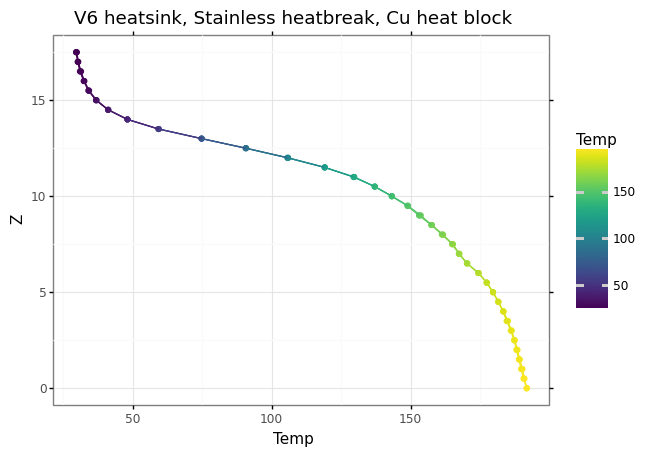

<ggplot: (297552111)>

In [17]:
profile_plot

In [22]:
plot_dir = '../Plots/Hotends'
makedirs(plot_dir, exist_ok=True)

In [65]:
profile_plot.save(filename=join(plot_dir, 'heatbreak_v6_stainless_cu.png'),
                  format='png',
                  width=6,
                  height=4)

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/heatbreak_v6_stainless_cu.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/u

## Generic import protocol

In [49]:
def load_temp_record(log_fp,
                     plot_dir,
                     trial="trial",
                     heatsink="heatsink",
                     heatbreak="heatbreak",
                     block="block",
                     nozzle="nozzle",
                     fan=True):

    with open(log_fp, 'r') as log_f:
        p_df = parse_temp_log(log_f,
                                    trial=trial,
                                    heatsink=heatsink,
                                    heatbreak=heatbreak,
                                    block=block,
                                    nozzle=nozzle,
                                    fan=fan)
    
    fanstr = "fan" if fan else "nofan"
    
    plot_title = "{0}_{1}_{2}_{3}_{4}-{5}".format(heatsink,
                                                  heatbreak,
                                                  block,
                                                  nozzle,
                                                  fan,
                                                  trial)
    
    profile_plot = (ggplot(p_df, aes('Z', 'Temp', color='Temp', group='factor(N)'))
                     + geom_point()
                     + geom_line()
                     + theme_bw()
                     + ggtitle(plot_title))
    
    profile_plot.save(filename=join(plot_dir, '%s.png' % plot_title),
                      format='png',
                      width=6,
                      height=4)
    
    return(p_df)

In [57]:
log_fp = '../Logs/20210326_V6-cu-Ti-fan.txt'
profile_df = load_temp_record(log_fp,
                                         plot_dir,
                                         trial="20210326_V6-cu-Ti-fan",
                                         heatsink="V6",
                                         heatbreak="Ti",
                                         block="Cu",
                                         nozzle="Cu",
                                         fan=True)

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/V6_Ti_Cu_Cu_True-20210326_V6-cu-Ti-fan.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packag

In [58]:
log_fp = '../Logs/20210326_V6-cu-Ti-nofan.txt'
profile_df = pd.concat([profile_df, 
                        load_temp_record(log_fp,
                                         plot_dir,
                                         trial="20210326_V6-cu-Ti-nofan",
                                         heatsink="V6",
                                         heatbreak="Ti",
                                         block="Cu",
                                         nozzle="Cu",
                                         fan=False)])

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/V6_Ti_Cu_Cu_False-20210326_V6-cu-Ti-nofan.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-pac

In [59]:
log_fp = '../Logs/20210326_V6-cu-TLBi-fan-02.txt'
profile_df = pd.concat([profile_df, 
                        load_temp_record(log_fp,
                                         plot_dir,
                                         trial="20210326_V6-cu-TLBi-fan",
                                         heatsink="V6",
                                         heatbreak="TL-Bimetal",
                                         block="Cu",
                                         nozzle="Cu",
                                         fan=True)])

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/V6_TL-Bimetal_Cu_Cu_True-20210326_V6-cu-TLBi-fan.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/s

In [60]:
log_fp = '../Logs/20210326_V6-cu-TLBi-nofan.txt'
profile_df = pd.concat([profile_df, 
                        load_temp_record(log_fp,
                                         plot_dir,
                                         trial="20210326_V6-cu-TLBi-nofan",
                                         heatsink="V6",
                                         heatbreak="TL-Bimetal",
                                         block="Cu",
                                         nozzle="Cu",
                                         fan=False)])

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/V6_TL-Bimetal_Cu_Cu_False-20210326_V6-cu-TLBi-nofan.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.

In [66]:
log_fp = '../Logs/20210326_V6-cu-Copperhead-fan.txt'
profile_df = pd.concat([profile_df, 
                        load_temp_record(log_fp,
                                         plot_dir,
                                         trial="20210326_V6-cu-Copperhead-fan",
                                         heatsink="V6",
                                         heatbreak="Copperhead",
                                         block="Cu",
                                         nozzle="Cu",
                                         fan=True)])

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/V6_Copperhead_Cu_Cu_True-20210326_V6-cu-Copperhead-fan.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/pytho

In [77]:
log_fp = '../Logs/20210326_V6-cu-Copperhead-nofan.txt'
profile_df = pd.concat([profile_df, 
                        load_temp_record(log_fp,
                                         plot_dir,
                                         trial="20210326_V6-cu-Copperhead-nofan",
                                         heatsink="V6",
                                         heatbreak="Copperhead",
                                         block="Cu",
                                         nozzle="Cu",
                                         fan=False)])

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/V6_Copperhead_Cu_Cu_False-20210326_V6-cu-Copperhead-nofan.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/py

In [83]:
log_fp = '../Logs/20210317_V6-cu-generic-fan.txt'
profile_df = pd.concat([profile_df, 
                        load_temp_record(log_fp,
                                         plot_dir,
                                         trial="20210317_V6-cu-generic-fan",
                                         heatsink="V6",
                                         heatbreak="generic_SS",
                                         block="Cu",
                                         nozzle="Cu",
                                         fan=True)])

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/V6_generic_SS_Cu_Cu_True-20210317_V6-cu-generic-fan.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.

In [87]:
log_fp = '../Logs/20210317_V6-cu-generic-nofan.txt'
profile_df = pd.concat([profile_df, 
                        load_temp_record(log_fp,
                                         plot_dir,
                                         trial="20210317_V6-cu-generic-nofan",
                                         heatsink="V6",
                                         heatbreak="generic_SS",
                                         block="Cu",
                                         nozzle="Cu",
                                         fan=False)])

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/V6_generic_SS_Cu_Cu_False-20210317_V6-cu-generic-nofan.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/pytho

In [88]:
profile_df['trial_N'] = profile_df['trial'].map(str) + '-' + profile_df['N'].map(str)

In [90]:
profile_plot = (ggplot(profile_df.loc[(profile_df['fan'])], aes('Z', 'Temp', color='heatbreak', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
 + ggtitle('V6 heatbreaks, with fan'))

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


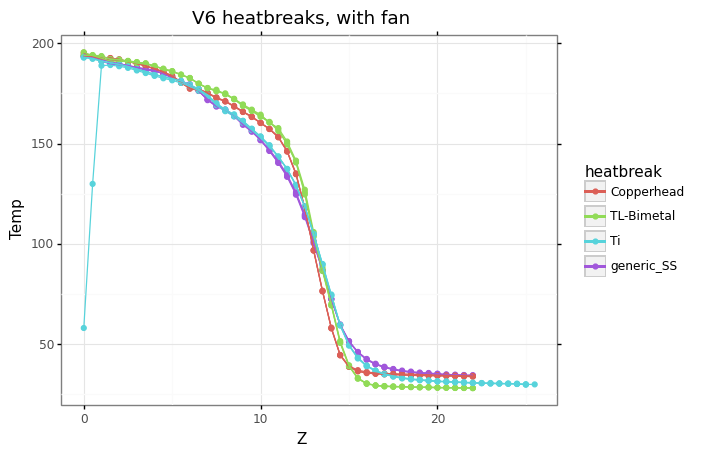

<ggplot: (306626473)>

In [91]:
profile_plot

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


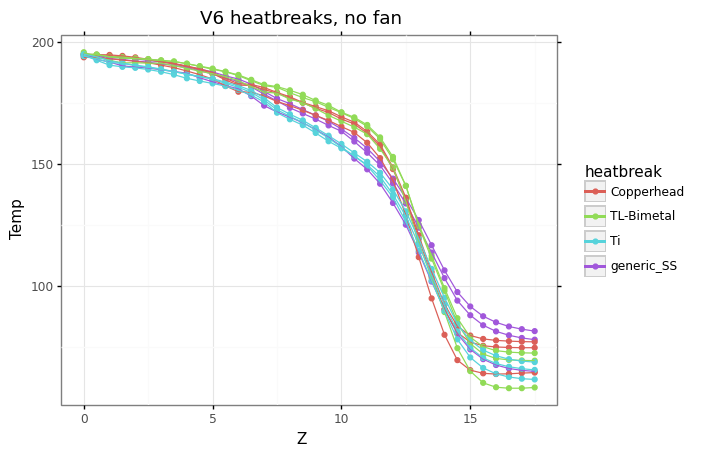

<ggplot: (305816945)>

In [89]:
profile_plot = (ggplot(profile_df.loc[~(profile_df['fan']) &
                                       (profile_df['Z'] < 18),], aes('Z', 'Temp', color='heatbreak', group='trial_N'))
 + geom_point()
 + geom_line()
 + theme_bw()
 + ggtitle('V6 heatbreaks, no fan'))
profile_plot